# Example notebook

## Showing how to use block bootstrap functions

In [1]:
## Import reqired modules
using BlockBootstrap
using Plots
using Statistics
using Primes

## Import custom data
function getTestDataPrimeInts(dataLength)
    firstNprimes = Array{Int64,1}(undef, dataLength+1);
    primeDiff = Array{Int64,1}(undef, dataLength);
    firstNprimes[1] = prime(1);
    for ii in 1:dataLength
        firstNprimes[ii+1] = prime(ii+1);
        primeDiff[ii] = firstNprimes[ii+1] - firstNprimes[ii];
    end
    return primeDiff
end;

In [2]:
## Import test data
dataLength = 550;
testData = getTestDataPrimeInts(dataLength);

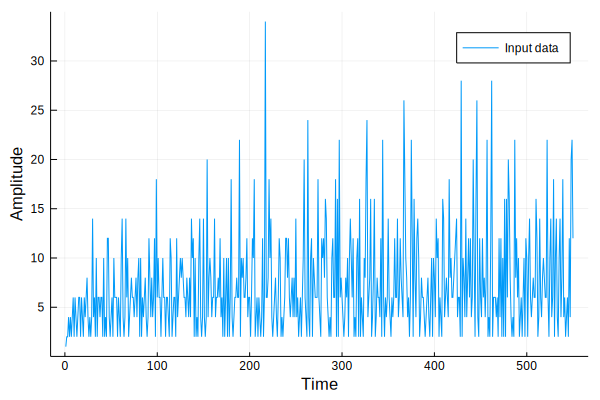

In [3]:
## Plot input data
plt1 = plot(testData, label = "Input data");
xlabel!("Time")
ylabel!("Amplitude")
display(plt1);

In [4]:
## Bootstrap Statistic
# E.g. standard deviation
statisticHandle = std;
bootstrapSampler = MBBsampler;
blockLength = 10;
Nblocks = 50;
NbootstrapReplicates = 200;
bsResult = 
bootstrapStatistic(testData, statisticHandle, bootstrapSampler, blockLength, NbootstrapReplicates);

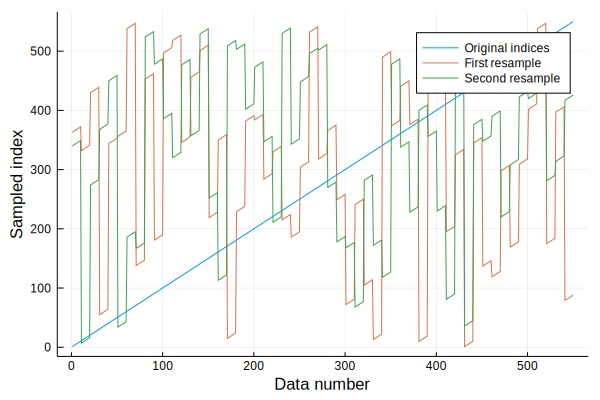

In [5]:
## Plot resampling indices
plt2 = plot(1:dataLength, label = "Original indices");
plot!(bsResult.resampleIndexBB[1], label = "First resample");
plot!(bsResult.resampleIndexBB[2], label = "Second resample");
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

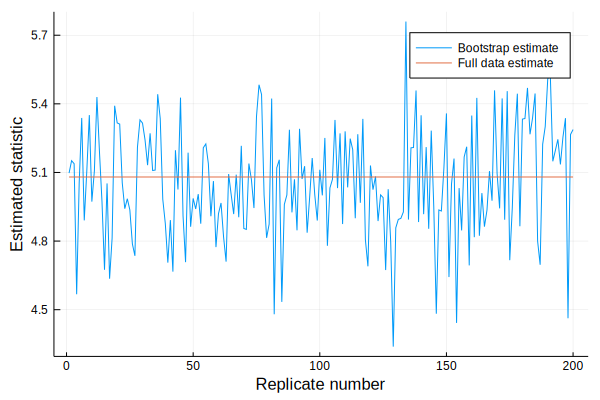

In [6]:
## Plot statistics results
plt3 = plot(bsResult.replicateEstimate, label = "Bootstrap estimate");
plot!(bsResult.fullDataEstimate*ones(size(bsResult.replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt3);

# Choosing a Block Length

On blocking rules for the bootstrap with dependent data
Hall, Horowitz, and Jing (1995)

SUMMARY
We address the issue of optimal block choice in applications of the block bootstrap to dependent data. It is shown that optimal block size depends significantly on context, being equal to $n^{1/3}$, $n^{1/4}$ and $n^{1/5}$ in the cases of variance or bias estimation, estimation of a onesided distribution function, and estimation of a two-sided distribution function, respectively. 

https://academic.oup.com/biomet/article/82/3/561/260651

Recall that dataLength = 550;

In [7]:
l1 = dataLength^(1/3); # bias and variance
l2 = dataLength^(1/4); # level-1 parameters
l3 = dataLength^(1/5); # level-2 parameters

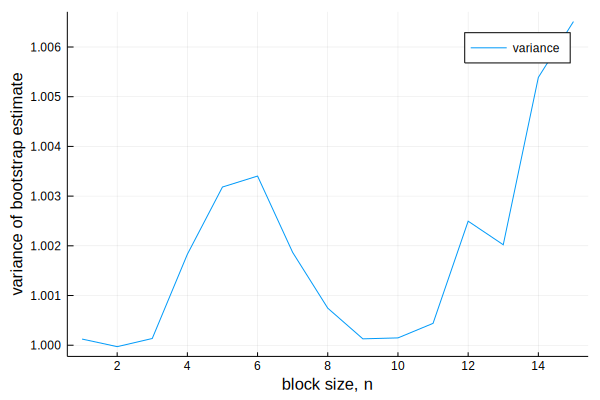

In [8]:
## Bootstrap Statistic
statisticHandle = mean;
bootstrapSampler = MBBsampler;
blockLength = range(1, step=1, length=15);
NbootstrapReplicates = 20000;

Nblocks = Array{Int64}(undef, length(blockLength))
bs_var = Array{Float64}(undef, length(blockLength))
bs_l2 = Array{Float64}(undef, length(blockLength))
bs_skew = Array{Float64}(undef, length(blockLength))
bs_kurt = Array{Float64}(undef, length(blockLength))

## Bootstrap Statistic using a range of block lengths
for i=1:length(blockLength)
    bsResult = 
    bootstrapStatistic(testData, statisticHandle, bootstrapSampler, 
        Int(blockLength[i]), NbootstrapReplicates);
    bs_var[i] = var(bsResult.replicateEstimate)
    bs_l2[i] = mean((bsResult.replicateEstimate.-bsResult.fullDataEstimate).^2)./bs_var[i]
    bs_skew[i] = mean((bsResult.replicateEstimate.-bsResult.fullDataEstimate).^3)./bs_var[i]^(3/2)
    bs_kurt[i] = mean((bsResult.replicateEstimate.-bsResult.fullDataEstimate).^4)./bs_var[i]^(4/2)
end


## Plot
plt4 = plot(blockLength,bs_l2, label = "variance");
xlabel!("block size, n")
ylabel!("variance of bootstrap estimate")
display(plt4);

In [9]:
l1 # bias and variance

8.193212706006458

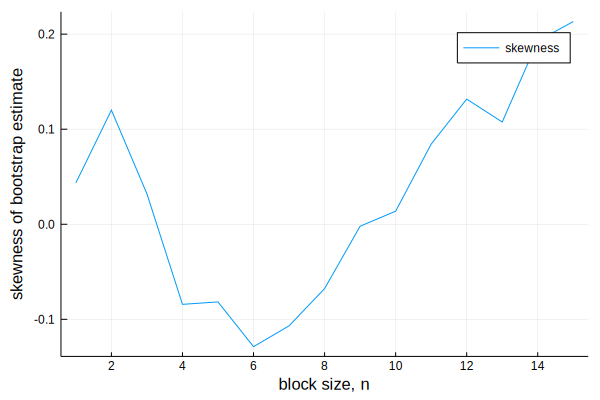

In [10]:
plt5 = plot(blockLength,bs_skew, label = "skewness");
xlabel!("block size, n")
ylabel!("skewness of bootstrap estimate")
display(plt5);

In [11]:
l2 # level-1 parameters

4.842734640584506

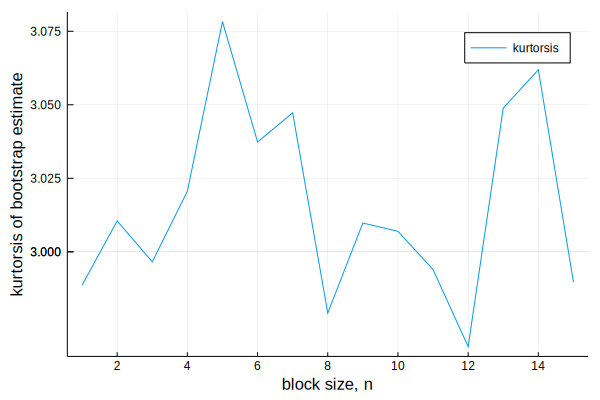

In [12]:
plt6 = plot(blockLength,bs_kurt, label = "kurtorsis");
xlabel!("block size, n")
ylabel!("kurtorsis of bootstrap estimate")
display(plt6);

In [13]:
l3 # level-2 parameters

3.5324216502617864